# Clasificación de texto

Utilizaremos el dataset Twenty News Groups

In [1]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
from collections import Counter
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import gensim
import os, re, csv, math, codecs

Using TensorFlow backend.


In [2]:
from pprint import pprint
pprint(newsgroups_train.target_names)
pprint(newsgroups_train.target)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
array([7, 4, 4, ..., 3, 1, 8])


In [3]:
print(newsgroups_train.data[16])

From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: TIFF: philosophical significance of 42
Organization: Purdue University
Lines: 39

In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin  
Preston) writes:
> Why not use the PD C library for reading/writing TIFF files? It took me a
> good 20 minutes to start using them in your own app.

I certainly do use it whenever I have to do TIFF, and it usually works
very well.  That's not my point.  I'm >philosophically< opposed to it
because of its complexity.

This complexity has led to some programs' poor TIFF writers making
some very bizarre files, other programs' inability to load TIFF
images (though they'll save them, of course), and a general
inability to interchange images between different environments
despite the fact they all think they understand TIFF.

As the saying goes, "It's not me I'm worried about- it's all the
>other<  assholes out there!"  I've had big trouble with misuse and
abuse of TIFF over the years, 

In [0]:
token=Tokenizer(num_words=30000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token="UNK", document_count=0)

In [0]:
token.fit_on_texts(newsgroups_train.data)

In [0]:
train_sequences=token.texts_to_sequences(newsgroups_train.data)
test_sequences=token.texts_to_sequences(newsgroups_test.data)


In [7]:
train_sequences[0]

[15,
 1,
 4309,
 1351,
 16,
 11127,
 39,
 251,
 30,
 43,
 299,
 10,
 18,
 96,
 79,
 92,
 23734,
 4309,
 1351,
 16,
 35,
 78,
 4,
 2953,
 611,
 1768,
 33,
 212,
 9,
 27,
 1309,
 28,
 172,
 67,
 48,
 124,
 9880,
 64,
 17,
 18,
 299,
 9,
 709,
 2,
 87,
 264,
 12,
 27,
 5,
 37,
 1498,
 2267,
 299,
 1163,
 3,
 19,
 15,
 2,
 1348,
 13638,
 844,
 15449,
 12,
 27,
 338,
 5,
 1,
 2,
 4018,
 81,
 183,
 485,
 8,
 1377,
 2,
 845,
 8165,
 27,
 1836,
 15,
 2,
 817,
 4,
 2,
 727,
 18,
 10,
 45,
 9,
 89,
 28,
 172,
 40,
 1,
 5,
 829,
 274,
 1079,
 2909,
 199,
 4,
 2805,
 154,
 18,
 299,
 10,
 240,
 629,
 26,
 809,
 358,
 14,
 22,
 17,
 18,
 21901,
 385,
 299,
 182,
 113,
 189,
 207,
 1499,
 1342,
 3,
 14,
 36,
 59,
 7861,
 1]

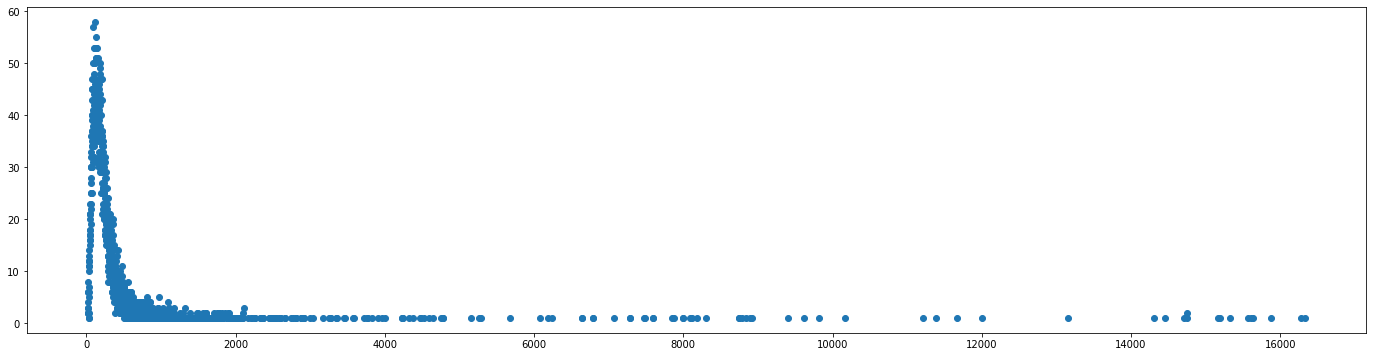

In [8]:
lengths=[len(seq) for seq in train_sequences]
lengths=dict(Counter(lengths))
plt.figure(figsize=[24,6])
plt.scatter(list(lengths.keys()), list(lengths.values()))
plt.show()

In [0]:
max_len=500
train_sequences=pad_sequences(train_sequences,maxlen=max_len)
test_sequences=pad_sequences(test_sequences,maxlen=max_len)


In [10]:
train_sequences[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

Agregar este archivo a la carpeta de google drive

https://drive.google.com/open?id=1zgSN39uX3OWxGyqwGDypKxQRokE0_njG

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
reverse_dictionary = token.index_word
dictionary = dict([(value, key) for (key, value) in reverse_dictionary.items()]) 


In [13]:
token.index_word

{1: 'UNK',
 2: 'the',
 3: 'to',
 4: 'of',
 5: 'a',
 6: "'ax",
 7: 'and',
 8: 'in',
 9: 'i',
 10: 'is',
 11: 'that',
 12: 'it',
 13: 'for',
 14: 'you',
 15: 'from',
 16: 'edu',
 17: 'on',
 18: 'this',
 19: 'be',
 20: 'are',
 21: 'not',
 22: 'have',
 23: 'with',
 24: 'as',
 25: '1',
 26: 'or',
 27: 'was',
 28: 'if',
 29: 'but',
 30: 'subject',
 31: 'they',
 32: 'com',
 33: 'lines',
 34: 'at',
 35: 'organization',
 36: 'by',
 37: '2',
 38: 'an',
 39: 'my',
 40: 'can',
 41: 'x',
 42: '3',
 43: 'what',
 44: '0',
 45: 'all',
 46: 'will',
 47: 'm',
 48: 'there',
 49: 'would',
 50: 'one',
 51: 'do',
 52: "'",
 53: 'about',
 54: 're',
 55: 'we',
 56: 'writes',
 57: 'so',
 58: 'he',
 59: 'your',
 60: 'no',
 61: 'has',
 62: 'article',
 63: 'any',
 64: 'me',
 65: 'some',
 66: 'who',
 67: 'out',
 68: 'which',
 69: '4',
 70: 'q',
 71: 'more',
 72: 'like',
 73: 'people',
 74: "don't",
 75: 'when',
 76: '5',
 77: 'just',
 78: 'university',
 79: 'posting',
 80: 'their',
 81: 'were',
 82: 'up',
 83: 'r'

In [14]:
#load embeddings
EMBEDDING_DIR = "/content/drive/My Drive/ITBA/Lab-NLP/Embeddings/fasttext/"
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open(EMBEDDING_DIR+'wiki-news-300d-1M.vec', encoding='utf-8')
for line in f:
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 999995 word vectors


In [0]:
embeddings_index["car"]

array([-1.600e-02, -3.000e-04, -1.684e-01,  8.990e-02, -2.000e-02,
       -9.300e-03,  4.820e-02, -3.080e-02, -4.510e-02,  6.000e-04,
        1.680e-01,  9.650e-02,  3.061e-01, -4.110e-02,  2.960e-02,
       -4.630e-02,  3.250e-02, -7.030e-02,  2.220e-02, -1.404e-01,
       -2.638e-01, -1.340e-02,  1.277e-01,  1.227e-01,  1.803e-01,
       -1.920e-02,  3.530e-02,  1.214e-01,  1.509e-01, -8.610e-02,
        9.760e-02, -2.550e-02, -2.760e-02, -1.556e-01, -7.390e-02,
        5.430e-02, -6.700e-02, -3.000e-03,  1.515e-01,  6.080e-02,
        3.300e-02,  7.470e-02,  9.000e-04,  5.500e-02,  4.800e-03,
       -1.320e-02, -2.620e-02, -1.804e-01,  8.050e-02,  4.640e-02,
       -1.590e-02, -3.020e-02, -6.785e-01,  1.632e-01,  1.030e-02,
        6.550e-02, -8.430e-02,  2.270e-02,  3.350e-02, -3.560e-02,
       -6.380e-02, -1.111e-01, -1.700e-03,  9.780e-02,  5.650e-02,
       -3.520e-02,  3.950e-02,  1.867e-01,  7.900e-02, -1.234e-01,
        1.860e-02,  8.900e-02,  1.631e-01,  7.830e-02,  5.610e

In [0]:
embed_dim=300
num_words=len(dictionary)+1
embedding_matrix=np.zeros([num_words,embed_dim])
for word, idx in dictionary.items():
  if idx <= num_words and word in embeddings_index:
    embedding_matrix[idx,:]=embeddings_index[word]

# Suma de embeddings + MLP

In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Lambda
from keras.models import Sequential,Model
from keras import optimizers
import keras.backend as K
nb_words=num_words
num_filters=64
model = Sequential()
model.add(Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Lambda(lambda x: K.sum(x, axis=1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='softmax'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 500, 300)          40243200  
_________________________________________________________________
lambda_14 (Lambda)           (None, 300)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                9632      
_________________________________________________________________
dense_55 (Dense)             (None, 20)                660       
Total params: 40,253,492
Trainable params: 10,292
Non-trainable params: 40,243,200
_________________________________________________________________


In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=32,epochs=20,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/20
9051/9051 [==============================] - 1s 150us/step - loss: 0.9130 - acc: 0.7079 - val_loss: 1.0482 - val_acc: 0.6659
Epoch 2/20
9051/9051 [==============================] - 1s 147us/step - loss: 0.9063 - acc: 0.7070 - val_loss: 1.0937 - val_acc: 0.6500
Epoch 3/20
9051/9051 [==============================] - 1s 146us/step - loss: 0.8906 - acc: 0.7119 - val_loss: 1.1059 - val_acc: 0.6509
Epoch 4/20
9051/9051 [==============================] - 1s 147us/step - loss: 0.8786 - acc: 0.7170 - val_loss: 1.0680 - val_acc: 0.6659
Epoch 5/20
9051/9051 [==============================] - 1s 146us/step - loss: 0.8843 - acc: 0.7167 - val_loss: 1.0724 - val_acc: 0.6637
Epoch 6/20
9051/9051 [==============================] - 1s 146us/step - loss: 0.8698 - acc: 0.7175 - val_loss: 1.1204 - val_acc: 0.6522
Epoch 7/20
9051/9051 [==============================] - 1s 148us/step - loss: 0.8729 - acc: 0.7185 - val_loss: 1.0709 - val_acc: 0.6602


## Clasificador Embeddings + CNN

In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
from keras.models import Sequential,Model
from keras import optimizers
nb_words=num_words
num_filters=64
model = Sequential()
model.add(Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='softmax'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 300)          40243200  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 500, 64)           134464    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 250, 128)          57472     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=32,epochs=20,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/20
9051/9051 [==============================] - 5s 522us/step - loss: 2.8174 - acc: 0.0932 - val_loss: 2.1761 - val_acc: 0.2598
Epoch 2/20
9051/9051 [==============================] - 4s 460us/step - loss: 1.7434 - acc: 0.3829 - val_loss: 1.2479 - val_acc: 0.5678
Epoch 3/20
9051/9051 [==============================] - 4s 461us/step - loss: 1.2058 - acc: 0.5680 - val_loss: 0.9530 - val_acc: 0.6810
Epoch 4/20
9051/9051 [==============================] - 4s 460us/step - loss: 0.9129 - acc: 0.6871 - val_loss: 0.7868 - val_acc: 0.7406
Epoch 5/20
9051/9051 [==============================] - 4s 461us/step - loss: 0.7395 - acc: 0.7516 - val_loss: 0.7168 - val_acc: 0.7738
Epoch 6/20
9051/9051 [==============================] - 4s 459us/step - loss: 0.6188 - acc: 0.7925 - val_loss: 0.6780 - val_acc: 0.7852
Epoch 7/20
9051/9051 [==============================] - 4s 459us/step - loss: 0.5202 - acc: 0.8272 - val_loss: 0.6487 - val_acc: 0.8025


## Clasificación con TextCNN


In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate
from keras.models import Model
from keras import optimizers
nb_words=num_words
num_filters=64
input_layer = Input(shape=(max_len,))
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
conv4=Conv1D(num_filters, 4, activation='relu', padding='same')(embedding_layer)
conv3=Conv1D(num_filters, 3, activation='relu', padding='same')(embedding_layer)
conv2=Conv1D(num_filters, 2, activation='relu', padding='same')(embedding_layer)
pool4=GlobalMaxPooling1D()(conv4)
pool3=GlobalMaxPooling1D()(conv3)
pool2=GlobalMaxPooling1D()(conv2)
added = Concatenate()([pool4, pool3, pool2])
dense1=Dense(32, activation='relu')(added)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 500, 300)     40243200    input_16[0][0]                   
__________________________________________________________________________________________________
conv1d_46 (Conv1D)              (None, 500, 64)      76864       embedding_19[0][0]               
__________________________________________________________________________________________________
conv1d_47 (Conv1D)              (None, 500, 64)      57664       embedding_19[0][0]               
___________________________________________________________________________________________

In [0]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 500, 300)     40243200    input_16[0][0]                   
__________________________________________________________________________________________________
conv1d_46 (Conv1D)              (None, 500, 64)      76864       embedding_19[0][0]               
__________________________________________________________________________________________________
conv1d_47 (Conv1D)              (None, 500, 64)      57664       embedding_19[0][0]               
___________________________________________________________________________________________

In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=32,epochs=20,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/20
9051/9051 [==============================] - 7s 826us/step - loss: 2.2187 - acc: 0.3908 - val_loss: 1.2111 - val_acc: 0.6871
Epoch 2/20
9051/9051 [==============================] - 6s 683us/step - loss: 0.8081 - acc: 0.7833 - val_loss: 0.6966 - val_acc: 0.7945
Epoch 3/20
9051/9051 [==============================] - 6s 685us/step - loss: 0.4665 - acc: 0.8736 - val_loss: 0.5930 - val_acc: 0.8268
Epoch 4/20
9051/9051 [==============================] - 6s 686us/step - loss: 0.2912 - acc: 0.9264 - val_loss: 0.5182 - val_acc: 0.8414
Epoch 5/20
9051/9051 [==============================] - 6s 686us/step - loss: 0.1750 - acc: 0.9659 - val_loss: 0.4892 - val_acc: 0.8568
Epoch 6/20
9051/9051 [==============================] - 6s 686us/step - loss: 0.1028 - acc: 0.9875 - val_loss: 0.4641 - val_acc: 0.8546
Epoch 7/20
9051/9051 [==============================] - 6s 685us/step - loss: 0.0578 - acc: 0.9964 - val_loss: 0.4525 - val_acc: 0.8599


# MLP + Embeddings + Attention

In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Flatten,Activation,Reshape
import keras.backend as K
from keras.activations import softmax
from keras.models import Model
from keras import optimizers

def softMaxOverTime(x):
    return softmax(x,axis=1)

key_dim=50
nb_words=num_words
num_filters=64
input_layer = Input(shape=(max_len,))
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
dense_input=Dense(key_dim,activation="tanh")(embedding_layer)
ulog_attention=Dense(1,activation="linear")(dense_input)
attention=Activation(softMaxOverTime)(ulog_attention)
repeated_attention=TimeDistributed(RepeatVector(embed_dim))(attention)
repeated_attention=Reshape([max_len,embed_dim])(repeated_attention)
weighted_embeddings=Multiply()([repeated_attention,embedding_layer])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1=Dense(32, activation='relu')(embedding_sum)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [0]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 500, 300)     40243200    input_18[0][0]                   
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 500, 50)      15050       embedding_21[0][0]               
__________________________________________________________________________________________________
dense_61 (Dense)                (None, 500, 1)       51          dense_60[0][0]                   
___________________________________________________________________________________________

In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=32,epochs=20,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/20
9051/9051 [==============================] - 5s 592us/step - loss: 2.3521 - acc: 0.3508 - val_loss: 1.4708 - val_acc: 0.6209
Epoch 2/20
9051/9051 [==============================] - 2s 263us/step - loss: 1.2538 - acc: 0.6542 - val_loss: 1.1738 - val_acc: 0.6801
Epoch 3/20
9051/9051 [==============================] - 2s 262us/step - loss: 1.0693 - acc: 0.6937 - val_loss: 1.0545 - val_acc: 0.7022
Epoch 4/20
9051/9051 [==============================] - 2s 261us/step - loss: 0.9554 - acc: 0.7252 - val_loss: 0.9621 - val_acc: 0.7234
Epoch 5/20
9051/9051 [==============================] - 2s 263us/step - loss: 0.8787 - acc: 0.7447 - val_loss: 0.9125 - val_acc: 0.7322
Epoch 6/20
9051/9051 [==============================] - 2s 264us/step - loss: 0.8273 - acc: 0.7604 - val_loss: 0.8796 - val_acc: 0.7419
Epoch 7/20
9051/9051 [==============================] - 2s 265us/step - loss: 0.7845 - acc: 0.7699 - val_loss: 0.8507 - val_acc: 0.7503


# MLP + Embeddings + Attention + CNN

In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Flatten, BatchNormalization
import keras.backend as K
from keras.activations import softmax
from keras.models import Model
from keras import optimizers
value_dim=100

def softMaxOverTime(x):
    return softmax(x,axis=1)


nb_words=num_words
num_filters=64
input_layer = Input(shape=(max_len,))
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
conv_out=Conv1D(value_dim,8,padding="same")(embedding_layer)
conv_out=Activation("relu")(conv_out)
#conv_out=Conv1D(value_dim,8,activation="relu",padding="same")(conv_out)
conv_out=Conv1D(value_dim,8,activation="tanh",padding="same")(conv_out)
ulog_attention=Dense(1,activation="linear")(conv_out)
attention=Activation(softMaxOverTime)(ulog_attention)
repeated_attention=TimeDistributed(RepeatVector(value_dim))(attention)
repeated_attention=Reshape([max_len,value_dim])(repeated_attention)
weighted_embeddings=Multiply()([repeated_attention,conv_out])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1=Dense(100, activation='relu')(embedding_sum)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [0]:
model.summary()

Model: "model_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_48 (Embedding)        (None, 500, 300)     40243200    input_45[0][0]                   
__________________________________________________________________________________________________
conv1d_45 (Conv1D)              (None, 500, 100)     240100      embedding_48[0][0]               
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 500, 100)     0           conv1d_45[0][0]                  
___________________________________________________________________________________________

In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=32,epochs=50,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/50
9051/9051 [==============================] - 14s 2ms/step - loss: 1.7271 - acc: 0.4261 - val_loss: 1.0237 - val_acc: 0.6553
Epoch 2/50
9051/9051 [==============================] - 8s 896us/step - loss: 0.7908 - acc: 0.7342 - val_loss: 0.7800 - val_acc: 0.7459
Epoch 3/50
9051/9051 [==============================] - 8s 896us/step - loss: 0.5665 - acc: 0.8082 - val_loss: 0.6665 - val_acc: 0.7914
Epoch 4/50
9051/9051 [==============================] - 8s 898us/step - loss: 0.4025 - acc: 0.8680 - val_loss: 0.6726 - val_acc: 0.8011
Epoch 5/50
9051/9051 [==============================] - 8s 900us/step - loss: 0.2768 - acc: 0.9117 - val_loss: 0.7308 - val_acc: 0.7972
Epoch 6/50
9051/9051 [==============================] - 8s 902us/step - loss: 0.2036 - acc: 0.9360 - val_loss: 0.7074 - val_acc: 0.8095
Epoch 7/50
9051/9051 [==============================] - 8s 902us/step - loss: 0.1402 - acc: 0.9582 - val_loss: 0.7198 - val_acc: 0.8206
E

# Bidir RNN + Attention

In [0]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Bidirectional, LSTM
import keras.backend as K
from keras.activations import softmax
from keras.models import Model
from keras import optimizers
value_dim=100

def softMaxOverTime(x):
    return softmax(x,axis=1)

nb_words=num_words
num_filters=64
input_layer = Input(shape=(max_len,))
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
# lstm_out=Bidirectional(LSTM(value_dim, return_sequences=True))(embedding_layer)
# lstm_out=Bidirectional(LSTM(value_dim, return_sequences=True))(lstm_out)
lstm_out=Bidirectional(LSTM(value_dim, return_sequences=True,activation="relu"),merge_mode="sum")(embedding_layer)
ulog_attention=Dense(1,activation="linear")(lstm_out)
attention=Activation(softMaxOverTime)(ulog_attention)
repeated_attention=TimeDistributed(RepeatVector(value_dim))(attention)
repeated_attention=Reshape([max_len,value_dim])(repeated_attention)
weighted_embeddings=Multiply()([repeated_attention,lstm_out])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1=Dense(100, activation='relu')(embedding_sum)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])


In [0]:
model.summary()

Model: "model_46"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_60 (Embedding)        (None, 500, 300)     40243200    input_57[0][0]                   
__________________________________________________________________________________________________
bidirectional_22 (Bidirectional (None, 500, 100)     320800      embedding_60[0][0]               
__________________________________________________________________________________________________
dense_165 (Dense)               (None, 500, 1)       101         bidirectional_22[0][0]           
___________________________________________________________________________________________

In [0]:
model.fit(train_sequences, newsgroups_train.target,batch_size=256,epochs=200,validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/200
9051/9051 [==============================] - 118s 13ms/step - loss: 2.9908 - acc: 0.0569 - val_loss: 2.9951 - val_acc: 0.0482
Epoch 2/200
8192/9051 [==========================>...] - ETA: 9s - loss: 2.9941 - acc: 0.0510 

KeyboardInterrupt: ignored